In [18]:
from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
lncf_hum_res = pd.read_table("meth_lncf_train_cpc2/hum_out.txt", sep="  ", engine='python')
lncf_hum_res = lncf_hum_res.drop(['id'], axis = 1)
print len(lncf_hum_res)
actual_hum_res = pd.read_table("meth_lncf_train_cpc2/hum_actual.txt")
print len(actual_hum_res)

lncf_mouse_res = pd.read_table("meth_lncf_train_cpc2/mouse_out.txt", sep="  ", engine='python')
lncf_mouse_res = lncf_mouse_res.drop(['id'], axis = 1)
#print lncf_mouse_res
actual_mouse_res = pd.read_table("meth_lncf_train_cpc2/mouse_actual.txt")

lncf_zebrafish_res = pd.read_table("meth_lncf_train_cpc2/zebrafish_out.txt", sep="  ", engine='python')
lncf_zebrafish_res = lncf_zebrafish_res.drop(['id'], axis = 1)
actual_zebrafish_res = pd.read_table("meth_lncf_train_cpc2/zebrafish_actual.txt")

lncf_gen_res = pd.read_table("meth_lncf_train_cpc2/gen_out.txt", sep="  ", engine='python')
print len(lncf_gen_res)
lncf_gen_res = lncf_gen_res.drop(['id'], axis = 1)
#print lncf_gen_model
actual_gen_res = pd.read_table("meth_lncf_train_cpc2/gen_actual.txt", engine='python')
print len(actual_gen_res)

lncf_mouse_gen_res = pd.read_table("newGC_Mouse.txt", sep="  ", engine='python')
print len(lncf_mouse_gen_res)
lncf_mouse_gen_res = lncf_mouse_gen_res.drop(['id'], axis = 1)
#print lncf_gen_model
actual_mouse_gen_res = pd.read_table("meth_lncf_train_cpc2/actual_gen_mouse.txt")
print len(actual_mouse_gen_res)

4999
4999
56934
56934
35710
35710


In [20]:
actual_hum_model = pd.get_dummies(actual_hum_res)
lncf_hum_model = pd.get_dummies(lncf_hum_res)

actual_mouse_model = pd.get_dummies(actual_mouse_res)
lncf_mouse_model = pd.get_dummies(lncf_mouse_res)

actual_zebrafish_model = pd.get_dummies(actual_zebrafish_res)
lncf_zebrafish_model = pd.get_dummies(lncf_zebrafish_res)

actual_gen_model = pd.get_dummies(actual_gen_res)
lncf_gen_model = pd.get_dummies(lncf_gen_res)

actual_mouse_gen_model = pd.get_dummies(actual_mouse_gen_res)
lncf_mouse_gen_model = pd.get_dummies(lncf_mouse_gen_res)


In [21]:
y_hum_test = actual_hum_model['label_noncoding']
y_mouse_test = actual_mouse_model['label_noncoding']
y_zebrafish_test = actual_zebrafish_model['label_noncoding']
y_gen_test = actual_gen_model['label_noncoding']
y_mouse_gen_test = actual_mouse_gen_model['label_noncoding']

y_lncf_hum_pred = lncf_hum_model['label_NonCoding']
y_lncf_mouse_pred = lncf_mouse_model['label_NonCoding']
y_lncf_zebrafish_pred = lncf_zebrafish_model['label_NonCoding']
y_lncf_gen_pred = lncf_gen_model['label_NonCoding']
y_lncf_mouse_gen_pred = lncf_mouse_gen_model['label_NonCoding']

In [22]:
#for human
accuracy = accuracy_score(y_hum_test, y_lncf_hum_pred)
print("Accuracy human: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_mouse_test, y_lncf_mouse_pred)
print("Accuracy mouse: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_zebrafish_test, y_lncf_zebrafish_pred)
print("Accuracy zebrafish: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_gen_test, y_lncf_gen_pred)
print("Accuracy gen: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_mouse_gen_test, y_lncf_mouse_gen_pred)
print("Accuracy mouse gen: %.2f%%" % (accuracy * 100.0))

Accuracy human: 96.38%
Accuracy mouse: 91.31%
Accuracy zebrafish: 87.41%
Accuracy gen: 85.13%
Accuracy mouse gen: 92.22%


In [ ]:
Accuracy human: 96.38%
Accuracy mouse: 91.31%
Accuracy zebrafish: 87.41%
Accuracy gen: 85.13%
Accuracy mouse gen: 92.22%

In [25]:
from sklearn.metrics import classification_report

target_names = ['class non coding', 'class coding']
print(classification_report(y_hum_test, y_lncf_hum_pred, target_names=target_names))

#target_names = ['class non coding', 'class coding']
print(classification_report(y_mouse_test, y_lncf_mouse_pred, target_names=target_names))

#target_names = ['class non coding', 'class coding']
print(classification_report(y_zebrafish_test, y_lncf_zebrafish_pred, target_names=target_names))

print(classification_report(y_gen_test, y_lncf_gen_pred, target_names=target_names))

print(classification_report(y_mouse_gen_test, y_lncf_mouse_gen_pred, target_names=target_names))

                  precision    recall  f1-score   support

class non coding       0.95      0.98      0.96      2499
    class coding       0.98      0.95      0.96      2500

       micro avg       0.96      0.96      0.96      4999
       macro avg       0.96      0.96      0.96      4999
    weighted avg       0.96      0.96      0.96      4999

                  precision    recall  f1-score   support

class non coding       0.92      0.90      0.91      1800
    class coding       0.90      0.92      0.91      1800

       micro avg       0.91      0.91      0.91      3600
       macro avg       0.91      0.91      0.91      3600
    weighted avg       0.91      0.91      0.91      3600

                  precision    recall  f1-score   support

class non coding       0.86      0.90      0.88      4000
    class coding       0.89      0.85      0.87      4000

       micro avg       0.87      0.87      0.87      8000
       macro avg       0.87      0.87      0.87      8000
    we

In [26]:
from sklearn.metrics import confusion_matrix

cm_hum = confusion_matrix(y_hum_test, y_lncf_hum_pred)
print(cm_hum)
cm_mouse = confusion_matrix(y_mouse_test, y_lncf_mouse_pred)
print(cm_mouse)
cm_zebrafish = confusion_matrix(y_zebrafish_test, y_lncf_zebrafish_pred)
print(cm_zebrafish)
cm_gen = confusion_matrix(y_gen_test, y_lncf_gen_pred)
print(cm_gen)
cm_gen = confusion_matrix(y_mouse_gen_test, y_lncf_mouse_gen_pred)
print(cm_gen)

[[2439   60]
 [ 121 2379]]
[[1625  175]
 [ 138 1662]]
[[3591  409]
 [ 598 3402]]
[[23949  4518]
 [ 3949 24518]]
[[16159  1696]
 [ 1083 16772]]


In [27]:
from sklearn.metrics import roc_auc_score

print roc_auc_score(y_hum_test, y_lncf_hum_pred)

print roc_auc_score(y_mouse_test, y_lncf_mouse_pred)

print roc_auc_score(y_zebrafish_test, y_lncf_zebrafish_pred)

print roc_auc_score(y_gen_test, y_lncf_gen_pred)

print roc_auc_score(y_mouse_gen_test, y_lncf_mouse_gen_pred)

0.9637951980792316
0.9130555555555555
0.8741250000000002
0.8512839428109742
0.9221786614393727


In [11]:
#precision : the ability of the classifier not to label as positive a sample that is negative.
#recall : the ability of the classifier to find all the positive samples
#f1-score :  F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0
# support : The support is the number of occurrences of each class in y_true.

<IPython.core.display.Javascript object>


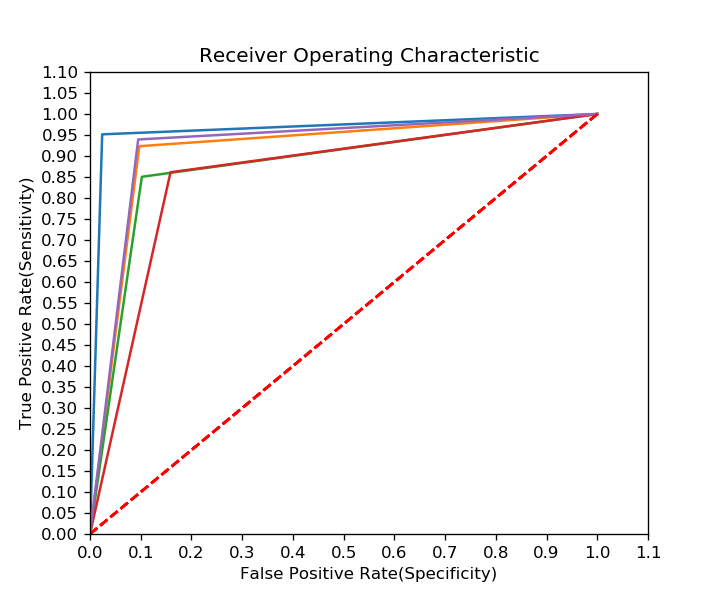

In [28]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hum_test, y_lncf_hum_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_mouse_test, y_lncf_mouse_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_zebrafish_test, y_lncf_zebrafish_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_gen_test, y_lncf_gen_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_mouse_gen_test, y_lncf_mouse_gen_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()